# Libraries

In [538]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Importing Dataset

In [539]:
# Importing Dataframes
df = pd.read_csv('CarData.csv')

In [540]:
df

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393.0,7.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,First,Individual,2179.0,7.0,70.0
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814.0,5.0,32.0
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196.0,5.0,45.0
2057,BMW,5-Series 520d Luxury Line [2017-2019],4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,Individual,1995.0,5.0,65.0


In [541]:
lbl = ['Make', 'Fuel Type', "Transmission", 'Location', 'Color', 'Owner', 'Seller Type']
for l in lbl:
    print(l, ' ', df[l].unique())
    print("\n")

Make   ['Honda' 'Maruti Suzuki' 'Hyundai' 'Toyota' 'Mercedes-Benz' 'BMW' 'Skoda'
 'Nissan' 'Renault' 'Tata' 'Volkswagen' 'Ford' 'Audi' 'Mahindra' 'MG'
 'Jeep' 'Porsche' 'Kia' 'Land Rover' 'Volvo' 'Maserati' 'Jaguar' 'Isuzu'
 'Fiat' 'MINI' 'Ferrari' 'Mitsubishi' 'Datsun' 'Lamborghini' 'Chevrolet'
 'Ssangyong' 'Rolls-Royce' 'Lexus']


Fuel Type   ['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric' 'CNG + CNG' 'Hybrid'
 'Petrol + CNG' 'Petrol + LPG']


Transmission   ['Manual' 'Automatic']


Location   ['Pune' 'Ludhiana' 'Lucknow' 'Mangalore' 'Mumbai' 'Coimbatore' 'Bangalore'
 'Delhi' 'Raipur' 'Kanpur' 'Patna' 'Vadodara' 'Hyderabad' 'Yamunanagar'
 'Gurgaon' 'Jaipur' 'Deoghar' 'Agra' 'Goa' 'Warangal' 'Jalandhar' 'Noida'
 'Ahmedabad' 'Mohali' 'Navi Mumbai' 'Ghaziabad' 'Kolkata' 'Zirakpur'
 'Nagpur' 'Thane' 'Faridabad' 'Ranchi' 'Chandigarh' 'Amritsar' 'Chennai'
 'Udupi' 'Panvel' 'Jamshedpur' 'Aurangabad' 'Rudrapur' 'Nashik' 'Varanasi'
 'Salem' 'Dehradun' 'Valsad' 'Haldwani' 'Dharwad' 'Surat' 'Indore'


# Dataset Description

1.  Make: The manufacturer or brand of the car (e.g., Honda, Maruti Suzuki, Hyundai).
2.  Model: Specific model name and variant of the car (e.g., Amaze 1.2 VX i-VTEC, Swift DZire VDI).
3.  Price: The selling price of the car in Indian Rupees (INR).
4.  Year: The manufacturing year of the car.
5.  Kilometer: The total kilometers driven by the car, indicating its usage.
6.  Fuel Type: Type of fuel used by the car (e.g., Petrol, Diesel).
7.  Transmission: Type of transmission system (e.g., Manual, Automatic).
8.  Location: City where the car is available for sale.
9.  Color: Exterior color of the car.
10. Owner: Ownership status of the car (e.g., First, Second).
11. Seller Type: Type of seller (e.g., Individual, Corporate).
12. Engine: Engine displacement or capacity, measured in cubic centimeters (cc).
13. Seating Capacity: Number of seats available in the car.
14. Fuel Tank Capacity: Capacity of the fuel tank in liters.

# Data Preprocessing & Cleaning

In [542]:
ftr = ['Price', 'Engine', 'Kilometer', 'Fuel Tank Capacity']
df[ftr] = df[ftr].apply(lambda x: np.log(x))

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [543]:
# Checking for Shape
df.shape

(2059, 14)

In [544]:
df.info

<bound method DataFrame.info of                Make                                  Model      Price  Year  \
0             Honda                    Amaze 1.2 VX i-VTEC  13.132314  2017   
1     Maruti Suzuki                        Swift DZire VDI  13.017003  2014   
2           Hyundai                   i10 Magna 1.2 Kappa2  12.301383  2011   
3            Toyota                               Glanza G  13.591116  2019   
4            Toyota        Innova 2.4 VX 7 STR [2016-2020]  14.483340  2018   
...             ...                                    ...        ...   ...   
2054       Mahindra                  XUV500 W8 [2015-2017]  13.652992  2016   
2055        Hyundai                           Eon D-Lite +  12.524526  2014   
2056           Ford            Figo Duratec Petrol ZXI 1.2  12.388394  2013   
2057            BMW  5-Series 520d Luxury Line [2017-2019]  15.271797  2018   
2058       Mahindra      Bolero Power Plus ZLX [2016-2019]  13.415033  2017   

      Kilometer Fue

In [545]:
df.columns

Index(['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type',
       'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine',
       'Seating Capacity', 'Fuel Tank Capacity'],
      dtype='object')

In [546]:
# Finding Missing Values in each Columns
df.isna().sum()

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64

In [547]:
# Handling Missing Values

# Columns with Missing Value
mv_col = ['Fuel Tank Capacity', 'Engine', 'Seating Capacity']

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df[mv_col] = imputer.fit_transform(df[mv_col])

In [548]:
df.describe()

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Price,Year,Kilometer,Engine,Seating Capacity,Fuel Tank Capacity
count,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000
mean,13.809072,2016.425449,-inf,7.372142,5.306266,3.911590
std,0.980903,3.363564,NaN,0.337227,0.809285,0.271410
min,10.799576,1988.000000,-inf,6.436150,2.000000,2.708050
25%,13.091902,2014.000000,10.275051,7.088409,5.000000,3.737670
50%,13.623139,2017.000000,10.819778,7.311886,5.000000,3.911590
75%,14.470437,2019.000000,11.184421,7.598399,5.000000,4.094345
max,17.370859,2022.000000,14.508658,8.793612,8.000000,4.653960


# Data Visualization

### Count of Cars by Make

C:\Users\hp\AppData\Local\Temp\ipykernel_14464\3684642667.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_makes.index, y=top_makes.values, palette="viridis")


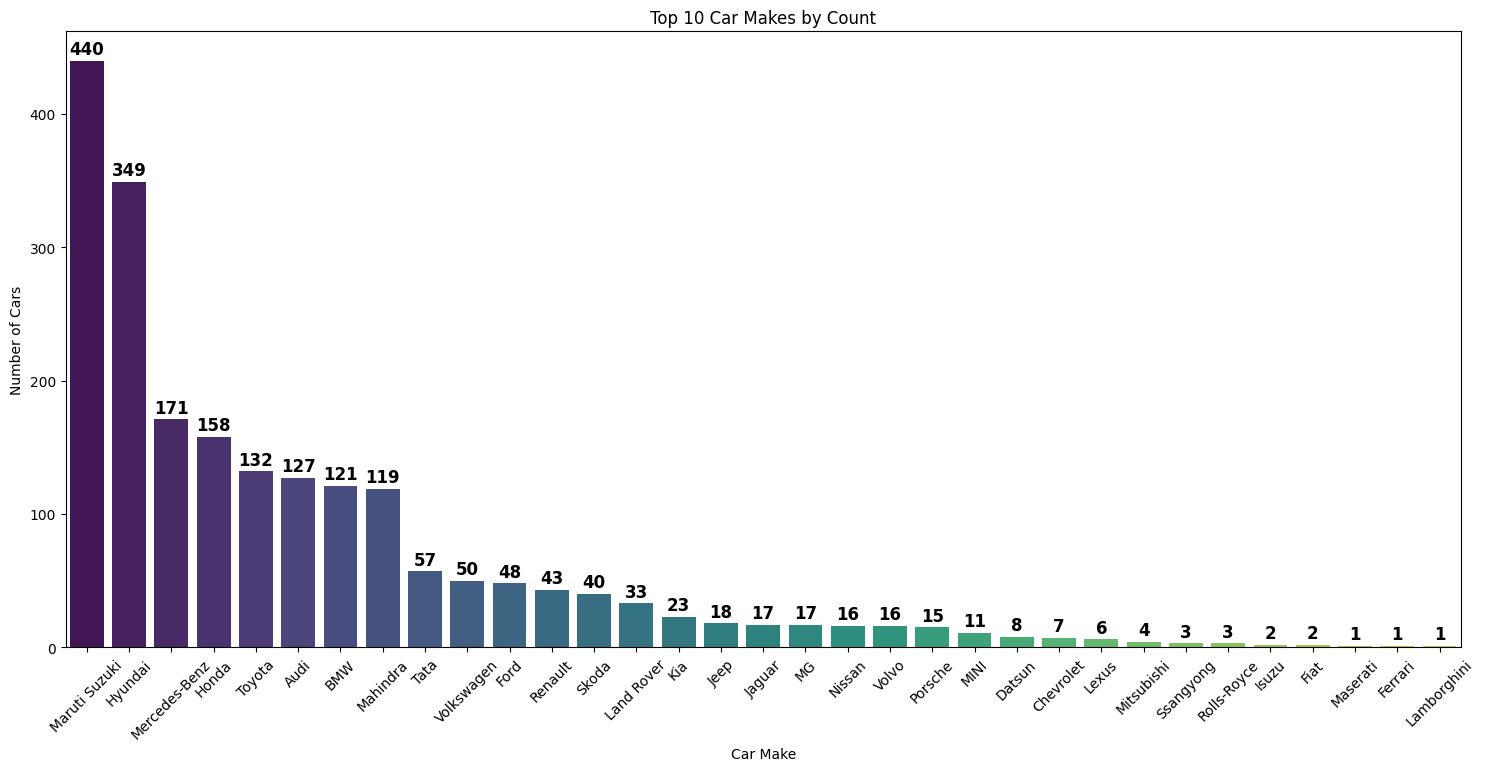

In [549]:
plt.figure(figsize=(18, 8))
top_makes = df['Make'].value_counts()  # Display top 10 makes for readability
sns.barplot(x=top_makes.index, y=top_makes.values, palette="viridis")
plt.title('Top 10 Car Makes by Count')
plt.xlabel('Car Make')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
for index, value in enumerate(top_makes.values):
    plt.text(index, value + 5, f"{value}", ha='center', fontsize=12, fontweight='bold')
plt.show()

### Selling Price Distribution

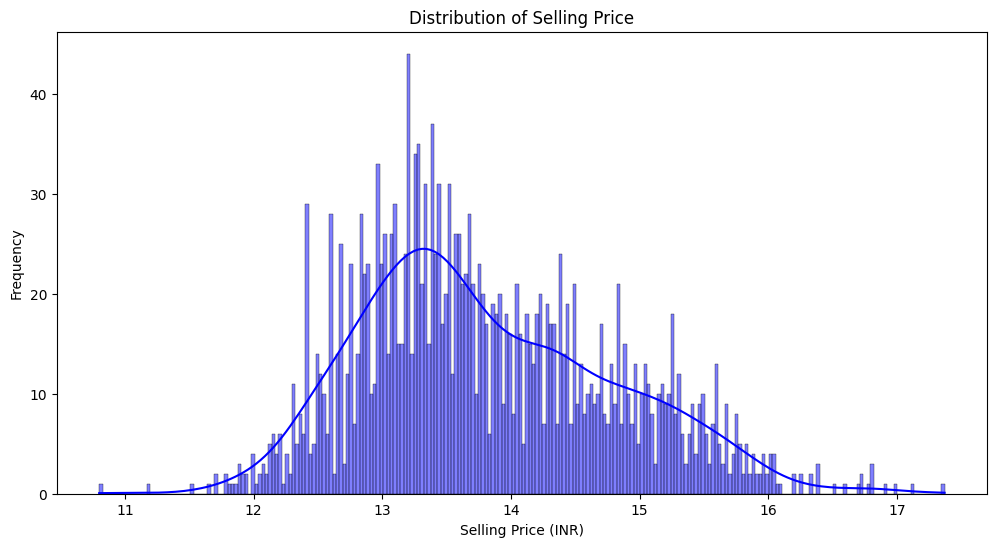

In [550]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Price'], kde=True, color='blue', bins=250)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price (INR)')
plt.ylabel('Frequency')
plt.show()

### Kilometer Driven Distribution

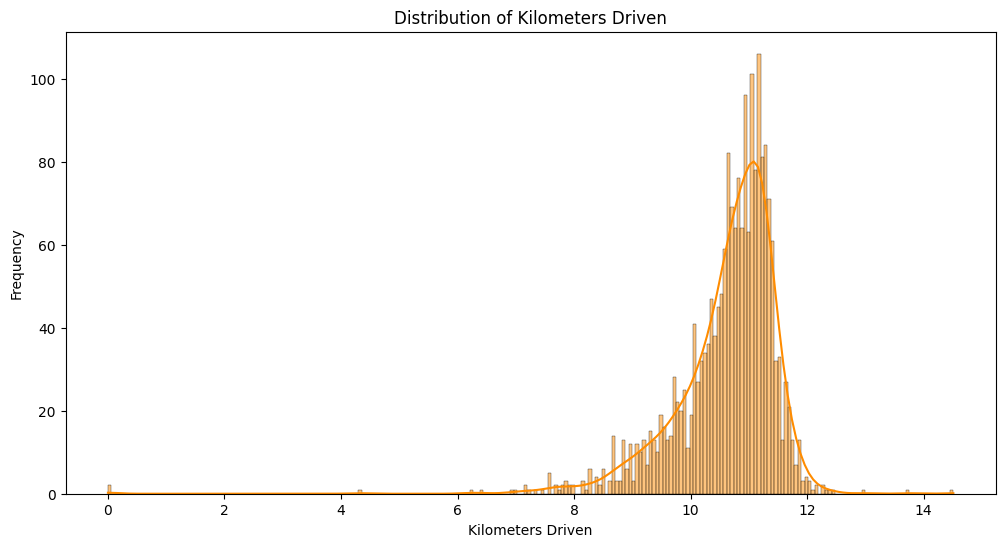

In [551]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Kilometer'], kde=True, color='darkorange', bins=250)
plt.title('Distribution of Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Frequency')
plt.show()

### Average Selling Price by Year

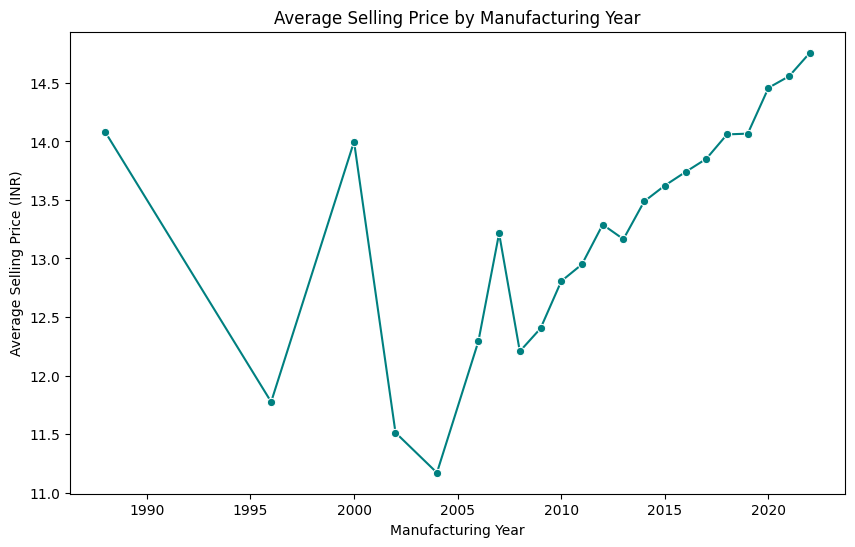

In [552]:
avg_price_by_year = df.groupby('Year')['Price'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=avg_price_by_year.index, y=avg_price_by_year.values, marker='o', color='teal')
plt.title('Average Selling Price by Manufacturing Year')
plt.xlabel('Manufacturing Year')
plt.ylabel('Average Selling Price (INR)')
plt.show()

# Model Training

In [553]:
dependent_variables = ['Make', 'Fuel Type', 'Owner', 'Engine', 'Seating Capacity', 'Fuel Tank Capacity']

X = df[dependent_variables]
Y = df['Price']/10

In [554]:
X

,Make,Fuel Type,Owner,Engine,Seating Capacity,Fuel Tank Capacity
0,Honda,Petrol,First,7.088409,5.0,3.555348
1,Maruti Suzuki,Diesel,Second,7.129298,5.0,3.737670
2,Hyundai,Petrol,First,7.087574,5.0,3.555348
3,Toyota,Petrol,First,7.087574,5.0,3.610918
4,Toyota,Diesel,First,7.780303,7.0,4.007333
...,...,...,...,...,...,...
2054,Mahindra,Diesel,First,7.686621,7.0,4.248495
2055,Hyundai,Petrol,Second,6.701960,5.0,3.465736
2056,Ford,Petrol,First,7.086738,5.0,3.806662
2057,BMW,Diesel,First,7.598399,5.0,4.174387


In [555]:
Y

0       1.313231
1       1.301700
2       1.230138
3       1.359112
4       1.448334
          ...   
2054    1.365299
2055    1.252453
2056    1.238839
2057    1.527180
2058    1.341503
Name: Price, Length: 2059, dtype: float64

In [556]:
# Handling Categorical Variables

categorical_features = [0, 1, 2] 
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse_output=False), categorical_features)], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [557]:
X

array([[0.        , 0.        , 0.        , ..., 7.08840878, 5.        ,
        3.55534806],
       [0.        , 0.        , 0.        , ..., 7.12929755, 5.        ,
        3.73766962],
       [0.        , 0.        , 0.        , ..., 7.08757371, 5.        ,
        3.55534806],
       ...,
       [0.        , 0.        , 0.        , ..., 7.08673793, 5.        ,
        3.80666249],
       [0.        , 1.        , 0.        , ..., 7.59839933, 5.        ,
        4.17438727],
       [0.        , 0.        , 0.        , ..., 7.3085428 , 7.        ,
        3.91158987]])

In [558]:
X.shape

(2059, 51)

In [559]:
Y.shape

(2059,)

In [560]:
# Splitting data into traning and testing
x_train , x_test , y_train , y_test = train_test_split(X , Y, test_size = 0.2 , random_state = 42)

In [561]:
# Scaling Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:, 0:6] = sc.fit_transform(x_train[:, 0:6])
x_test[:, 0:6] = sc.transform(x_test[:, 0:6])

In [562]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)
y_pred_linear = model.predict(x_test)

In [563]:
from sklearn.preprocessing import PolynomialFeatures


poly_features = PolynomialFeatures(degree=2)
X_poly_train = poly_features.fit_transform(x_train)
X_poly_test = poly_features.transform(x_test)

poly_regressor = LinearRegression()
poly_regressor.fit(X_poly_train, y_train)
y_pred_poly = poly_regressor.predict(X_poly_test)

In [564]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Metrics for Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Metrics for Polynomial Regression
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Linear Regression Metrics:")
print(f"Mean Squared Error (MSE): {mse_linear:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_linear:.2f}")
print(f"Mean Absolute Error (MAE): {mae_linear:.2f}")
print(f"R-squared (R²): {r2_linear:.2f}\n")

print("Polynomial Regression Metrics:")
print(f"Mean Squared Error (MSE): {mse_poly:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_poly:.2f}")
print(f"Mean Absolute Error (MAE): {mae_poly:.2f}")
print(f"R-squared (R²): {r2_poly:.2f}")

Linear Regression Metrics:
Mean Squared Error (MSE): 3512655679836061171712.00
Root Mean Squared Error (RMSE): 59267661332.60
Mean Absolute Error (MAE): 4732095632.54
R-squared (R²): -372704350999813375918080.00

Polynomial Regression Metrics:
Mean Squared Error (MSE): 718875404892412444672.00
Root Mean Squared Error (RMSE): 26811851948.20
Mean Absolute Error (MAE): 1562464666.93
R-squared (R²): -76275051029954385936384.00
